# Dynamic Programming


In [235]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
Table = [15, 12, 10, 10, 10, 40, 40]
p=0.5

V=np.zeros((8, 52))
orders=np.zeros((8, 52))


## Dynamic Programming
for t in reversed(range(0,7)):
    for x in range(0,51):
        for a in range(0,min(11,51-x)):
            mean = 0
            for k in range(0,Table[t]+1):
                newx = max(0,x+a-k)
                mean += ((2*min(k,x+a)-a)+V[t+1,newx])*binom.pmf(k,Table[t],p)
            if(mean > V[t,x]):
                V[t,x] = mean
                orders[t,x] = a

[  65.26893418   66.49577564   67.6504804    68.75691928   69.82964563
   70.87803775   71.9090257    72.9280202    73.93913153   74.94531766
   75.94858628   76.95022064   77.95099167   78.9513338    79.95147614
   80.95153148   81.95155151   82.95155823   83.95156031   84.95156091
   85.95156106   86.9515611    87.9515611    88.95156111   89.95156111
   90.95156111   91.95156111   92.95156111   93.95156111   94.95156111
   95.95156111   96.95156111   97.95156111   98.95156111   99.95156111
  100.95156111  101.95156111  102.95156111  103.95156111  104.95156111
  105.95156111  106.95156111  107.95156111  108.95156111  109.95156111
  110.9515611   111.9515611   112.95156106  113.95156091  114.95156031
  115.95155823    0.        ]


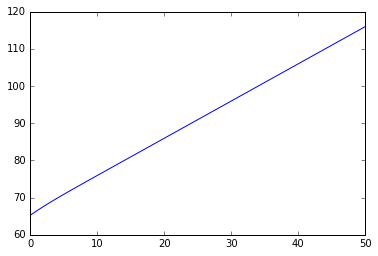

In [244]:
print(V[0,:])

# Preprocessing: Removing last column and row, 
# only of use for dynamic programming.

optimised_value = np.delete(V ,V.shape[0]-1,0)
optimised_value = np.delete(optimised_value ,-1, 1)
plt.plot(optimised_value[0,:])

The more initial stock the vendor has, the higher the expected profit is.

## Initial stock

In [245]:
def initial_stock(price):
    temp = [e * price for e in list(range(len(optimised_value[0,:])))]
    expected_profit = optimised_value[0,:] -  temp
    print(expected_profit)
    print('initial_stock :', np.argmax(expected_profit))
    return np.argmax(expected_profit)

In [246]:
initial_stock(1)
initial_stock(0.75)
initial_stock(1.25)

[ 65.26893418  65.49577564  65.6504804   65.75691928  65.82964563
  65.87803775  65.9090257   65.9280202   65.93913153  65.94531766
  65.94858628  65.95022064  65.95099167  65.9513338   65.95147614
  65.95153148  65.95155151  65.95155823  65.95156031  65.95156091
  65.95156106  65.9515611   65.9515611   65.95156111  65.95156111
  65.95156111  65.95156111  65.95156111  65.95156111  65.95156111
  65.95156111  65.95156111  65.95156111  65.95156111  65.95156111
  65.95156111  65.95156111  65.95156111  65.95156111  65.95156111
  65.95156111  65.95156111  65.95156111  65.95156111  65.95156111
  65.9515611   65.9515611   65.95156106  65.95156091  65.95156031
  65.95155823]
initial_stock : 36
[ 65.26893418  65.74577564  66.1504804   66.50691928  66.82964563
  67.12803775  67.4090257   67.6780202   67.93913153  68.19531766
  68.44858628  68.70022064  68.95099167  69.2013338   69.45147614
  69.70153148  69.95155151  70.20155823  70.45156031  70.70156091
  70.95156106  71.2015611   71.4515611   7

0

Thus, note that when the initial stock is at 1\$, there is no preferable initial stock amount because you can also purchase them later at the same price.

For initial unitary stock at 0.75\$, as it is cheaper than the normal 1\$ price, the vendor has to buy the maximal possible amount.

For initial unitary stock at 1.25\$, as it is more expensive than the normal 1\$ price, the vendor has to buy 0 stocks.

## Simulating the problem

In [247]:
def Monte_Carlo(iterations = 1000, u = 5, initial = 0):
    Profit = []
    for i in range(iterations):
        profit = 0
        s = initial
        for e in Table:
            u_temp = u
            if (s+u>=50): 
                u_temp = 50 - s 
                s = 50
            else: s += u_temp
            estim = np.random.binomial(e,p)
            if estim > s: estim = s
            profit += 2*estim - u_temp
            s -= estim
        Profit.append(profit)
    return np.mean(Profit)
        

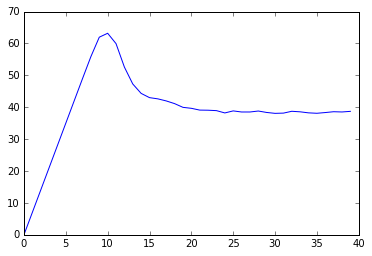

In [249]:
Monte_Carlo_u = [Monte_Carlo(u=i) for i in range(40)]
plt.plot(Monte_Carlo_u)

We can see that there is a first stage of growing profit with growing daily purchases, then a downturn because the vendor buys more than he sells. Then, the profit is constant because he can not have more than 50 units in stock.

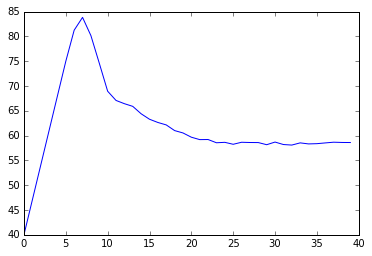

In [250]:
Monte_Carlo_u = [Monte_Carlo(u=i, initial = 20) for i in range(40)]
plt.plot(Monte_Carlo_u)

In [251]:
print(max(Monte_Carlo_u))
print(optimised_value[0,19])

83.836
84.9515609053


Thus, the expected value computed with Monte-Carlo simulation is equal to $V_0(s_0)$.

# Going further

In [252]:
V=np.zeros((8, 52))
orders=np.zeros((8, 52))
V[7,:] = list(range(52))

for t in reversed(range(0,7)):
    for x in range(0,51):
        for a in range(0,min(11,51-x)):
            mean = 0
            for k in range(0,Table[t]+1):
                newx = max(0,x+a-k)
                mean += ((2*min(k,x+a)-a)+V[t+1,newx])*binom.pmf(k,Table[t],p)
            if(mean > V[t,x]):
                V[t,x] = mean
                orders[t,x] = a

[  66.81302561   68.20125096   69.51209317   70.76073906   71.95742486
   73.11005867   74.22582734   75.31153182   76.37341924   77.41698585
   78.44686984   79.46683391   80.47981731   81.4880334    82.49309042
   83.4961166    84.49787648   85.49887067   86.49941601   87.49970631
   88.4998562    89.49993122   90.49996758   91.49998463   92.49999236
   93.49999574   94.49999716   95.49999773   96.49999795   97.49999803
   98.49999806   99.49999807  100.49999807  101.49999807  102.49999808
  103.49999808  104.49999808  105.49999808  106.49999808  107.49999808
  108.49999808  109.49999808  110.49999808  111.49999808  112.49999808
  113.49999808  114.49999808  115.49999808  116.49999808  117.49999808
  118.49999808    0.        ]


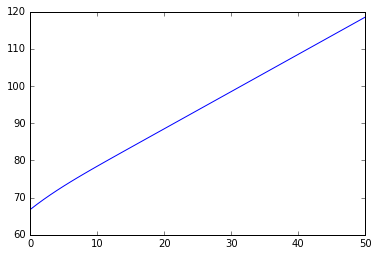

In [253]:
print(V[0,:])

# Preprocessing: Removing last column and row, 
# only of use for dynamic programming.

optimised_value = np.delete(V ,V.shape[0]-1,0)
optimised_value = np.delete(optimised_value ,-1, 1)
plt.plot(optimised_value[0,:])

The optimal value is greater than the ine in question 3, this is due to the possibility of selling the remaining stock at the end of the week.